In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from factor_analyzer import FactorAnalyzer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.svm import SVR
import seaborn as sns

# 1. Predicting gVRF with FA

Our latent factor of general vascular risk (gVRF) is a continuous variable. 

Therefore,
we considered that the optimal algorithm to predict it is the ordinary least squares
Linear Regression from the "linear-model" class in Scikit-learn [1].

In [2]:
# Loading the data
data = pd.read_csv('casuality_data_final_factor_analyzer.csv')
data.shape

(2065, 1428)

In [3]:
# Filtering data groups
heart_df = data.filter(regex='heart')
cardio_cmr_df = data.filter(regex='cardio_cmr')
brain_df = data.filter(regex='brain')
heart_df.shape, cardio_cmr_df.shape, brain_df.shape

((2065, 630), (2065, 9), (2065, 744))

In [4]:
# latent factor of general vascular risk, our target variable
Y2 = data["g_VRF"]

In [5]:
# our model
LR = LinearRegression()

This algorithm it’s a linear model with coefficients $w = (w1, . . . , wp)$ to minimize the
residual sum of squares between the observed targets in the dataset, and the targets
predicted by the linear approximation

## 1.1 Predicting gVRF with heart variables

In [6]:
# Input variables
X1 = heart_df

In [7]:
# Dimensionality reduction
factor_heart = FactorAnalysis(n_components=5)
X_heart_cfa = factor_heart.fit_transform(X1, Y2)
X_heart_cfa.shape

(2065, 5)

In [8]:
# Splitting our input data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_heart_cfa, Y2, test_size= 0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1445, 5), (620, 5), (1445,), (620,))

In [9]:
# Data normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Fitting the model and doing the predictions
LR.fit(X_train, y_train)
y_pred=LR.predict(X_test)

In [11]:
print(LR.intercept_)
print(LR.coef_)

-2.036649342212435
[-1.03508276  2.13146636 -0.6810416   1.96174632  2.78432979]


In [12]:
import statsmodels.api as sm
#   If you want to add constants
X = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train, missing='drop')
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  g_VRF   R-squared (uncentered):                   0.188
Model:                            OLS   Adj. R-squared (uncentered):              0.185
Method:                 Least Squares   F-statistic:                              66.68
Date:                Tue, 21 Jul 2020   Prob (F-statistic):                    9.01e-63
Time:                        22:30:23   Log-Likelihood:                         -1964.2
No. Observations:                1445   AIC:                                      3938.
Df Residuals:                    1440   BIC:                                      3965.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [13]:
dif = y_test-y_pred

In [14]:
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# Mean Squared Error (MSE) is the mean of the squared errors
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# R^2 (coefficient of determination) regression score function.
print('r2_score:', metrics.r2_score(y_test, y_pred))
# MAPE: mean absolute percentage error
print('MAPE:', np.mean(np.abs((y_test - y_pred) / y_test)))

Mean Absolute Error: 0.7892000435797022
Mean Squared Error: 0.9565994111745296
Root Mean Squared Error: 0.9780590018881936
r2_score: 0.21833555696844142
MAPE: 3.136305486066031


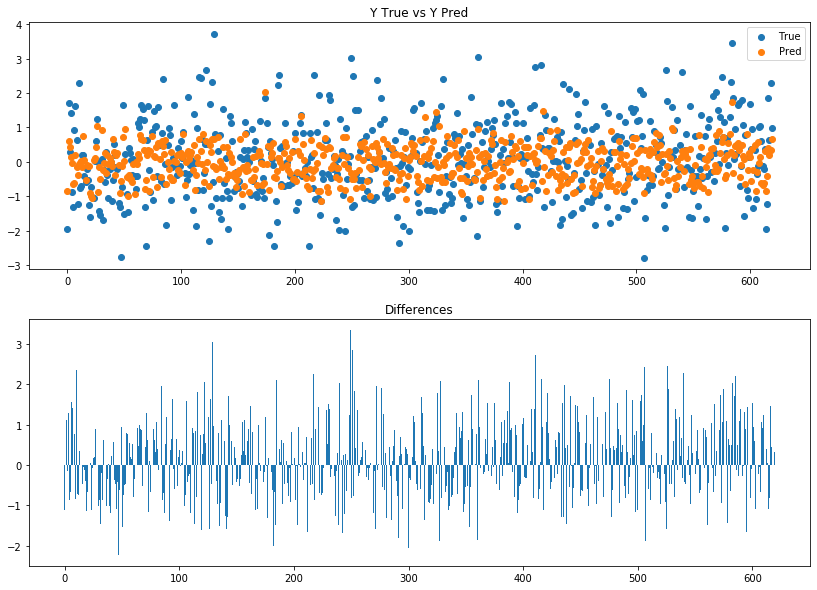

In [15]:
fig = plt.figure(figsize=(14,10))
fig.add_subplot(211)
plt.scatter(range(len(y_test)), list(y_test), label='True')
plt.scatter(range(len(y_test)), list(y_pred), label='Pred')
plt.title('Y True vs Y Pred')
plt.legend()
fig.add_subplot(212)
plt.bar(range(len(y_test)), dif)
plt.title('Differences')
plt.show()

## 1.2 Predicting gVRF with CMR variables

In [16]:
# Input variables
X1 = cardio_cmr_df

In [17]:
# Dimensionality reduction
factor_cardio = FactorAnalysis(n_components=5)
X_cardio_cfa = factor_cardio.fit_transform(X1, Y2)
X_cardio_cfa.shape

(2065, 5)

In [18]:
# Splitting our input data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_cardio_cfa, Y2, test_size= 0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1445, 5), (620, 5), (1445,), (620,))

In [19]:
# Data normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# Fitting the model and doing the predictions
LR.fit(X_train, y_train)
y_pred=LR.predict(X_test)

In [21]:
print(LR.intercept_)
print(LR.coef_)

-1.593100879674011
[ 0.07072666  0.86976311 -0.63809405  1.08015989  3.32056806]


In [22]:
import statsmodels.api as sm
#   If you want to add constants
X = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train, missing='drop')
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  g_VRF   R-squared (uncentered):                   0.111
Model:                            OLS   Adj. R-squared (uncentered):              0.108
Method:                 Least Squares   F-statistic:                              36.11
Date:                Tue, 21 Jul 2020   Prob (F-statistic):                    6.38e-35
Time:                        22:30:38   Log-Likelihood:                         -2029.3
No. Observations:                1445   AIC:                                      4069.
Df Residuals:                    1440   BIC:                                      4095.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [23]:
dif = y_test-y_pred

In [24]:
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# Mean Squared Error (MSE) is the mean of the squared errors
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# R^2 (coefficient of determination) regression score function.
print('r2_score:', metrics.r2_score(y_test, y_pred))
# MAPE: mean absolute percentage error
print('MAPE:', np.mean(np.abs((y_test - y_pred) / y_test)))

Mean Absolute Error: 0.8211685100310399
Mean Squared Error: 1.0422364108920932
Root Mean Squared Error: 1.020899804531323
r2_score: 0.14835914165272035
MAPE: 2.333822169596745


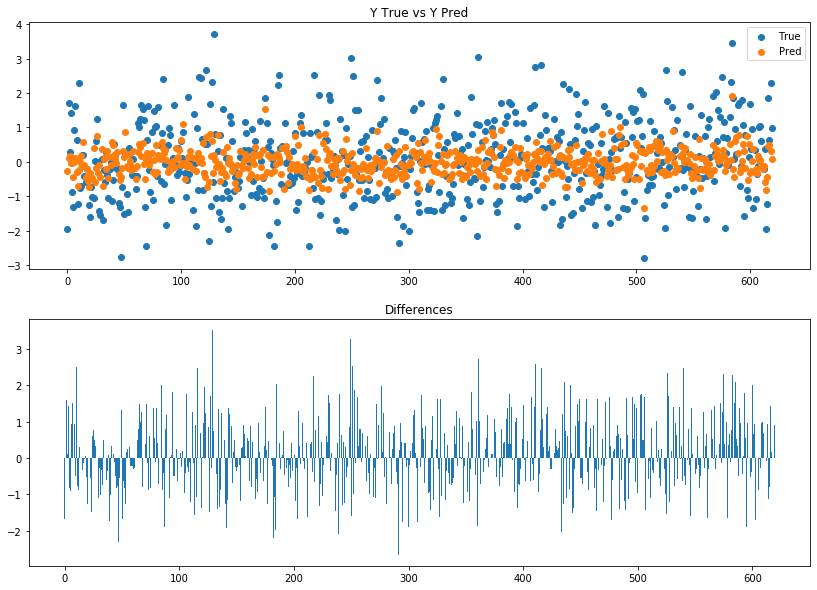

In [25]:
fig = plt.figure(figsize=(14,10))
fig.add_subplot(211)
plt.scatter(range(len(y_test)), list(y_test), label='True')
plt.scatter(range(len(y_test)), list(y_pred), label='Pred')
plt.title('Y True vs Y Pred')
plt.legend()
fig.add_subplot(212)
plt.bar(range(len(y_test)), dif)
plt.title('Differences')
plt.show()

## 1.3 Predicting gVRF with brain variables

In [26]:
# Input variables
X1 = brain_df

In [27]:
# Dimensionality reduction
factor_brain = FactorAnalysis(n_components=5)
X_brain_cfa = factor_brain.fit_transform(X1, Y2)
X_brain_cfa.shape

(2065, 5)

In [28]:
# Splitting our input data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_brain_cfa, Y2, test_size= 0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1445, 5), (620, 5), (1445,), (620,))

In [29]:
# Data normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Fitting the model and doing the predictions
LR.fit(X_train, y_train)
y_pred=LR.predict(X_test)

In [31]:
print(LR.intercept_)
print(LR.coef_)

0.04576668435925316
[-1.48216817  1.46396959  0.74591094 -0.8269533  -0.00401111]


In [32]:
import statsmodels.api as sm
#   If you want to add constants
X = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train, missing='drop')
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  g_VRF   R-squared (uncentered):                   0.113
Model:                            OLS   Adj. R-squared (uncentered):              0.109
Method:                 Least Squares   F-statistic:                              36.52
Date:                Tue, 21 Jul 2020   Prob (F-statistic):                    2.62e-35
Time:                        22:31:07   Log-Likelihood:                         -2028.4
No. Observations:                1445   AIC:                                      4067.
Df Residuals:                    1440   BIC:                                      4093.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [33]:
dif = y_test-y_pred

In [34]:
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# Mean Squared Error (MSE) is the mean of the squared errors
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# R^2 (coefficient of determination) regression score function.
print('r2_score:', metrics.r2_score(y_test, y_pred))
# MAPE: mean absolute percentage error
print('MAPE:', np.mean(np.abs((y_test - y_pred) / y_test)))

Mean Absolute Error: 0.8236620587615074
Mean Squared Error: 1.0650224125321737
Root Mean Squared Error: 1.0319992308777046
r2_score: 0.12974005504985398
MAPE: 1.9983018732537612


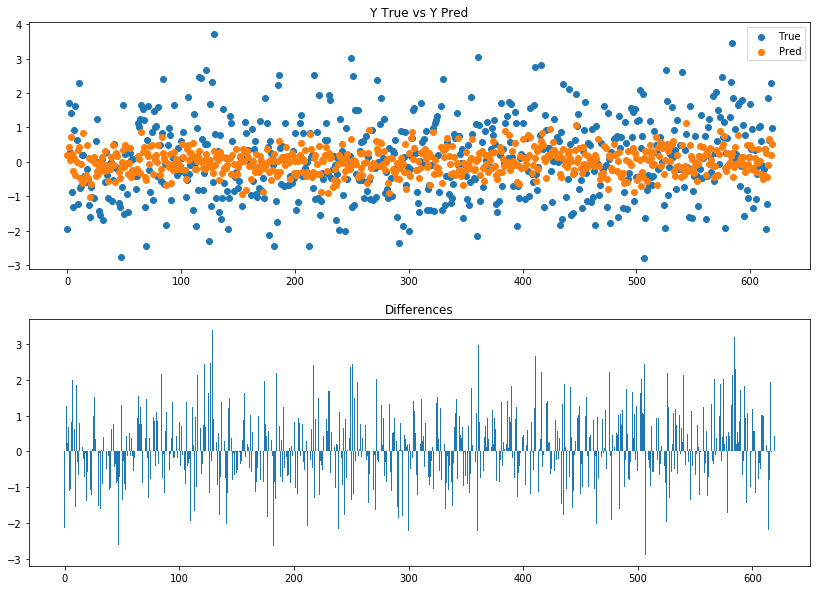

In [35]:
fig = plt.figure(figsize=(14,10))
fig.add_subplot(211)
plt.scatter(range(len(y_test)), list(y_test), label='True')
plt.scatter(range(len(y_test)), list(y_pred), label='Pred')
plt.title('Y True vs Y Pred')
plt.legend()
fig.add_subplot(212)
plt.bar(range(len(y_test)), dif)
plt.title('Differences')
plt.show()

## 1.4 Predicting gVRF with heart/brain combinations

In [36]:
# Input variables
X1 = heart_df
X2 = brain_df

In [37]:
# Combining datasets
X_combination_cfa = pd.concat((X1, X2), axis=1)
X_combination_cfa.shape

(2065, 1374)

In [38]:
# Dimensionality reduction
factor_1 = FactorAnalysis(n_components=5)
X_factor1_cfa = factor_1.fit_transform(X_combination_cfa, Y2)
X_factor1_cfa.shape

(2065, 5)

In [39]:
# Splitting our input data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_factor1_cfa, Y2, test_size= 0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1445, 5), (620, 5), (1445,), (620,))

In [40]:
# Data normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
# Fitting the model and doing the predictions
LR.fit(X_train, y_train)
y_pred=LR.predict(X_test)

In [42]:
print(LR.intercept_)
print(LR.coef_)

0.10120416215367554
[-1.07514433  2.06765704 -0.72693185  1.91590676 -2.0361511 ]


In [43]:
X = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train, missing='drop')
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  g_VRF   R-squared (uncentered):                   0.146
Model:                            OLS   Adj. R-squared (uncentered):              0.143
Method:                 Least Squares   F-statistic:                              49.05
Date:                Tue, 21 Jul 2020   Prob (F-statistic):                    5.39e-47
Time:                        22:32:49   Log-Likelihood:                         -2001.0
No. Observations:                1445   AIC:                                      4012.
Df Residuals:                    1440   BIC:                                      4038.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [44]:
dif = y_test-y_pred

In [45]:
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# Mean Squared Error (MSE) is the mean of the squared errors
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# R^2 (coefficient of determination) regression score function.
print('r2_score:', metrics.r2_score(y_test, y_pred))
# MAPE: mean absolute percentage error
print('MAPE:', np.mean(np.abs((y_test - y_pred) / y_test)))

Mean Absolute Error: 0.820095300661576
Mean Squared Error: 1.0410958776146417
Root Mean Squared Error: 1.0203410594573963
r2_score: 0.14929110366175347
MAPE: 2.333954695088141


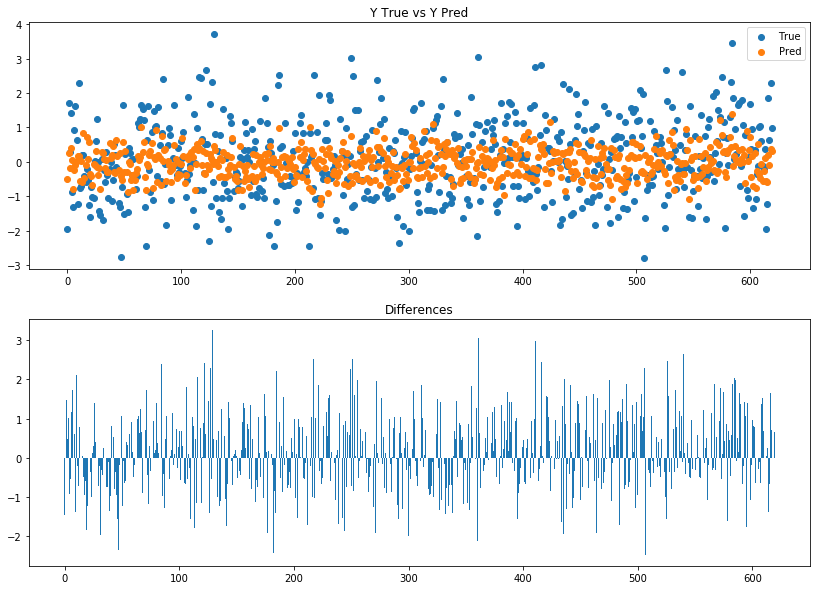

In [46]:
fig = plt.figure(figsize=(14,10))
fig.add_subplot(211)
plt.scatter(range(len(y_test)), list(y_test), label='True')
plt.scatter(range(len(y_test)), list(y_pred), label='Pred')
plt.title('Y True vs Y Pred')
plt.legend()
fig.add_subplot(212)
plt.bar(range(len(y_test)), dif)
plt.title('Differences')
plt.show()

## 1.5 Predicting gVRF with CMR/brain combinations

In [47]:
# Input variables
X1 = cardio_cmr_df
X2 = brain_df

In [48]:
# Combining datasets
X_combination_cfa_2 = pd.concat((X1, X2), axis=1)
X_combination_cfa_2.shape

(2065, 753)

In [49]:
# Dimensionality reduction
factor_2 = FactorAnalysis(n_components=5)
X_factor2_cfa = factor_2.fit_transform(X_combination_cfa_2, Y2)
X_factor2_cfa.shape

(2065, 5)

In [50]:
# Splitting our input data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_factor2_cfa, Y2, test_size= 0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1445, 5), (620, 5), (1445,), (620,))

In [51]:
# Data normalization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [52]:
# Fitting the model and doing the predictions
LR.fit(X_train, y_train)
y_pred=LR.predict(X_test)

In [53]:
print(LR.intercept_)
print(LR.coef_)

0.045972612326861256
[-1.48218795  1.46396318  0.74590994 -0.82723493 -0.00518348]


In [54]:
X = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train, missing='drop')
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  g_VRF   R-squared (uncentered):                   0.113
Model:                            OLS   Adj. R-squared (uncentered):              0.109
Method:                 Least Squares   F-statistic:                              36.52
Date:                Tue, 21 Jul 2020   Prob (F-statistic):                    2.61e-35
Time:                        22:33:22   Log-Likelihood:                         -2028.4
No. Observations:                1445   AIC:                                      4067.
Df Residuals:                    1440   BIC:                                      4093.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [55]:
dif = y_test-y_pred

In [56]:
# Mean Absolute Error (MAE) is the mean of the absolute value of the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# Mean Squared Error (MSE) is the mean of the squared errors
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# R^2 (coefficient of determination) regression score function.
print('r2_score:', metrics.r2_score(y_test, y_pred))
# MAPE: mean absolute percentage error
print('MAPE:', np.mean(np.abs((y_test - y_pred) / y_test)))

Mean Absolute Error: 0.8236534195711743
Mean Squared Error: 1.0650024393405007
Root Mean Squared Error: 1.0319895538911723
r2_score: 0.12975637570985243
MAPE: 1.9983262736041116


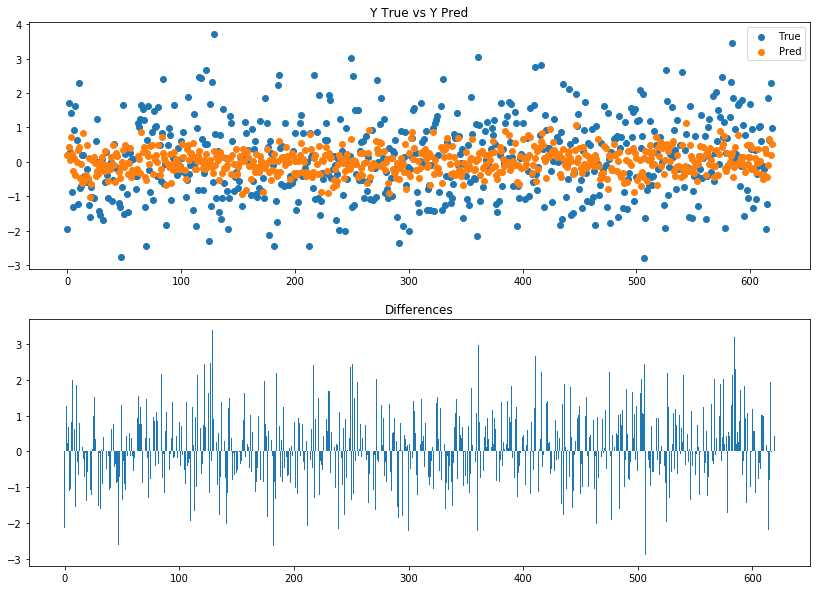

In [57]:
fig = plt.figure(figsize=(14,10))
fig.add_subplot(211)
plt.scatter(range(len(y_test)), list(y_test), label='True')
plt.scatter(range(len(y_test)), list(y_pred), label='Pred')
plt.title('Y True vs Y Pred')
plt.legend()
fig.add_subplot(212)
plt.bar(range(len(y_test)), dif)
plt.title('Differences')
plt.show()

## 1.6 Correlation Plots

In [58]:
factor_heart.components_.shape, factor_cardio.components_.shape, factor_brain.components_.shape

((5, 630), (5, 9), (5, 744))

In [59]:
factor_1.components_.shape, factor_2.components_.shape

((5, 1374), (5, 753))

In [60]:
factor_heart_transposed = factor_heart.components_.T
factor_cardio_transposed = factor_cardio.components_.T
factor_brain_transposed = factor_brain.components_.T
factor_1_transposed = factor_1.components_.T
factor_2_transposed = factor_2.components_.T

In [61]:
factor_heart_transposed.shape, factor_cardio_transposed.shape, factor_brain_transposed.shape

((630, 5), (9, 5), (744, 5))

In [62]:
factor_1_transposed.shape, factor_2_transposed.shape

((1374, 5), (753, 5))

In [63]:
heart_components = pd.DataFrame(factor_heart_transposed, index=heart_df.columns)
cardio_components = pd.DataFrame(factor_cardio_transposed, index=cardio_cmr_df.columns)
brain_components = pd.DataFrame(factor_brain_transposed, index=brain_df.columns)
factor_1_components = pd.DataFrame(factor_1_transposed, index=X_combination_cfa.columns)
factor_2_components = pd.DataFrame(factor_2_transposed, index=X_combination_cfa_2.columns)

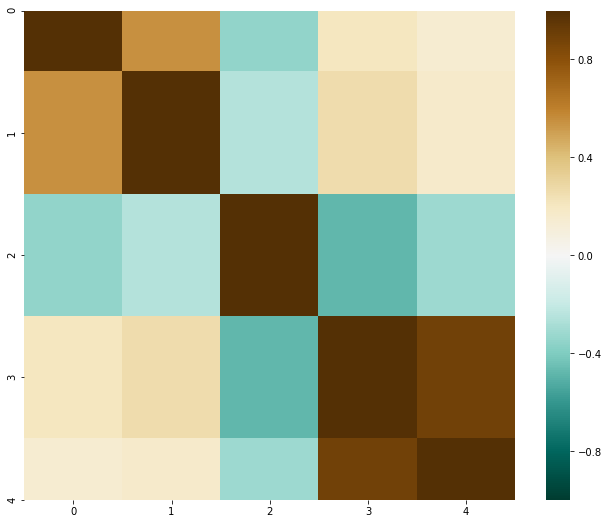

In [69]:
heart_corr = heart_components.corr()
plt.figure(figsize=(11,9))
sns.heatmap(heart_corr, cmap=plt.cm.BrBG_r, vmin=-1, vmax=1)
plt.show()

# 2. References

[1] [Pedregosa, F. et al. (2011)](https://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf). Scikit-learn: Machine Learning in Python.